# Assignment 2
### Understanding Uncertainty
### Due 9/12

Hongfei Zhu (nga3rp)

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

The most profitble item is the one that makes the most money; meaning whichever liqour has the highest (state bottle retail - state bottle cost) * bottles sold. 

In [54]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('~/DS5030/DS5030-self/data/iowa.csv')
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [55]:
df["Profit Per Bottle"] = df["State Bottle Retail"] - df["State Bottle Cost"]
df["Profit Total"] = df["Profit Per Bottle"] * df["Bottles Sold"]

profit_by_item = (
    df.groupby("Item Description", as_index=False)["Profit Total"]
      .sum()
      .sort_values("Profit Total", ascending=False)
)
print(profit_by_item)


                      Item Description  Profit Total
5022              TITOS HANDMADE VODKA     364074.35
636                       BLACK VELVET     274676.85
1854         FIREBALL CINNAMON WHISKEY     187535.22
1323                       CROWN ROYAL     160981.95
1358           CROWN ROYAL REGAL APPLE     122880.40
...                                ...           ...
3995                          RED STAG          1.89
3192                MALIBU SUNDAE MINI          1.65
4238  SEAGRAM'S PEACH TWISTED GIN MINI          1.65
4123      ROMANA SAMBUCA HOLIDAY MINIS          1.00
3501        OLD ELK 10YR WHEAT WHISKEY        -32.50

[5401 rows x 2 columns]


<Axes: xlabel='Profit Total', ylabel='Item Description'>

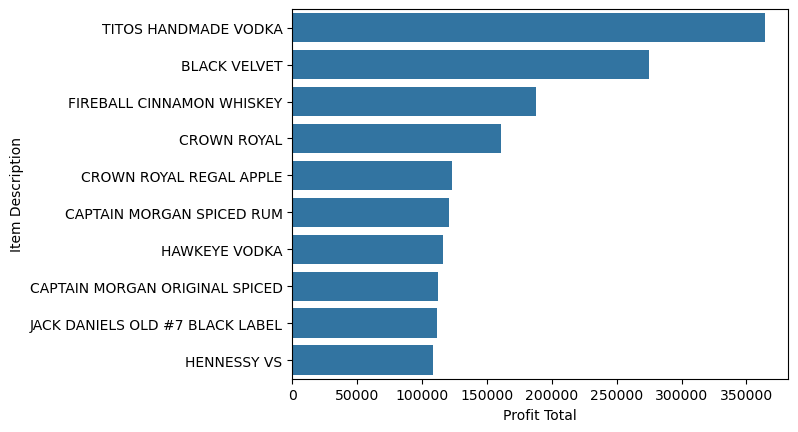

In [25]:
top10 = profit_by_item.head(10)
sns.barplot(data=top10, x="Profit Total", y="Item Description")

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [26]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

x.reshape(-1, 1) - y.reshape(1, -1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [27]:
x.reshape(1, -1) - y.reshape(-1, 1)

array([[-1,  1,  3],
       [-4, -2,  0]])

When I try to subtract them, it gives an error since I'm trying to perform an operation on two vectors with incompatible shapes.

x.reshape(-1, 1) yields me a (1, 3) vector, while x.reshape(1, -1) yields me a (3, 1) vector.

In [28]:
result1 = np.zeros((len(x), len(y)), dtype=int)
for i in range(len(x)):
    for j in range(len(y)):
        result1[i,j] = x[i] - y[j]
result1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [29]:
result2 = np.zeros((len(y), len(x)), dtype=int)
for i in range(len(y)):
    for j in range(len(x)):
        result2[i,j] = x[j] - y[i]
result2

array([[-1,  1,  3],
       [-4, -2,  0]])

x.reshape(1, -1) makes x a row vector with shape (1, n); x.reshape(-1, 1) makes x a column vector with shape (n, 1).

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

<Axes: >

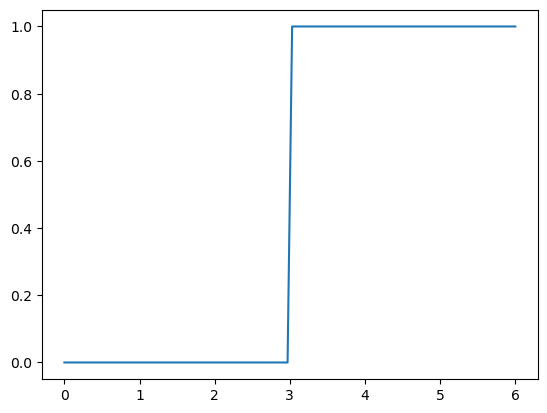

In [30]:
import numpy as np
import seaborn as sns

x = 3
z = np.linspace(0, 6, 100)
indicator = (x <= z).astype(int)
sns.lineplot(x=z, y=indicator)

$\mathbb{I}\{ x \le z \}$ is a switch that turns on (1) when x is less than or equal to z, and stays off (0) other wise. When we take 1 - $\mathbb{I}\{ x \le z \}$, we're just flipping the switch. Since whenever $\mathbb{I}\{ x \le z \} = 1$, subtracting 1 makes it 0. Whenever $\mathbb{I}\{ x \le z \} = 0$, subracting from 1 makes it 1.

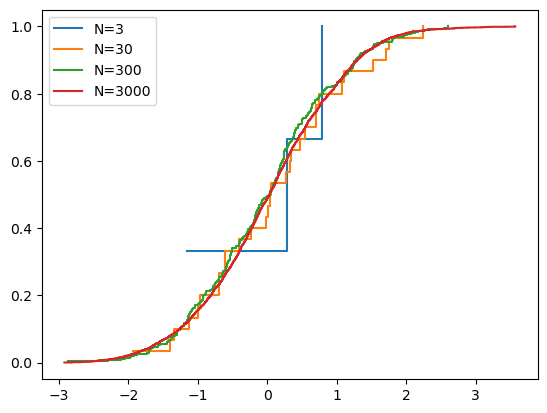

In [33]:
rng = np.random.default_rng(100)

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    x_ecdf, y_ecdf = ecdf(X)
    sns.lineplot(x=x_ecdf, y=y_ecdf, drawstyle="steps-post", label=f"N={N}")


As the sample size increases, the ECDF becomes smoother and less jagged. Qualitatively, it becomes closer and closer to the true distribution, merging towards the population CDF.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [40]:
def quantile(data, q):
    if not 0 <= q <= 1:
        raise ValueError("q must be between 0 and 1")
    
    sorted_data = sorted(data)
    n = len(sorted_data)

    if n == 0:
        raise ValueError("data must not be empty")
    
    index = q * (n - 1)

    if index == int(index):
        return sorted_data[int(index)]
    else:
        lower_index = int(index)
        upper_index = lower_index + 1
        lower_value = sorted_data[lower_index]
        upper_value = sorted_data[upper_index]
        return lower_value + (upper_value - lower_value) * (index - lower_index)
    
data = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]

print(quantile(data, 0.25))
print(quantile(data, 0.5))
print(quantile(data, 0.75))
print(np.quantile(data, 0.25))
print(np.quantile(data, 0.5))
print(np.quantile(data, 0.75))

2.5
4
5.0
2.5
4.0
5.0


In [59]:
def iqr(data):
    q1 = quantile(data, 0.25)
    median = quantile(data, 0.5)
    q3 = quantile(data, 0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    lower_whisker = min((x for x in data if x >= lower_bound), default=q1)
    upper_whisker = max((x for x in data if x <= upper_bound), default=q3)

    return {
        "IQR": iqr,
        "Lower Whisker": lower_whisker,
        "Upper Whisker": upper_whisker
    }

df_data = pd.DataFrame(data)
print(iqr(data))
print(df_data.describe())  # Note: np.iqr returns only the IQR value

{'IQR': 2.5, 'Lower Whisker': 1, 'Upper Whisker': 6}
               0
count  11.000000
mean    4.000000
std     2.366432
min     1.000000
25%     2.500000
50%     4.000000
75%     5.000000
max     9.000000


In [60]:
def summary(data):
    q1 = quantile(data, 0.25)
    median = quantile(data, 0.5)
    q3 = quantile(data, 0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    lower_whisker = min((x for x in data if x >= lower_bound), default=q1)
    upper_whisker = max((x for x in data if x <= upper_bound), default=q3)

    min_value = min(data)
    max_value = max(data)

    return {
        ".25 Quantile": q1,
        "Median": median,
        ".75 Quantile": q3,
        "IQR": iqr,
        "Lower Whisker": lower_whisker,
        "Upper Whisker": upper_whisker,
        "Min": min_value,
        "Max": max_value
    }
print(summary(data))   

{'.25 Quantile': 2.5, 'Median': 4, '.75 Quantile': 5.0, 'IQR': 2.5, 'Lower Whisker': 1, 'Upper Whisker': 6, 'Min': 1, 'Max': 9}


In [50]:
def outliers(data):
    q1 = quantile(data, 0.25)
    q3 = quantile(data, 0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    is_outlier = [x < lower_bound or x > upper_bound for x in data]
    return is_outlier

print(outliers(data))

[False, False, False, False, False, True, False, False, False, False, False]


In [63]:
print(quantile(df["Profit Total"], 0.25))
print(quantile(df["Profit Total"], 0.5))
print(quantile(df["Profit Total"], 0.75))

print(iqr(df["Profit Total"]))
print(summary(df["Profit Total"]))
print(outliers(df["Profit Total"]))

12.180000000000003
26.219999999999995
51.0
{'IQR': 38.81999999999999, 'Lower Whisker': -45.0, 'Upper Whisker': 109.20000000000002}
{'.25 Quantile': 12.180000000000003, 'Median': 26.219999999999995, '.75 Quantile': 51.0, 'IQR': 38.81999999999999, 'Lower Whisker': -45.0, 'Upper Whisker': 109.20000000000002, 'Min': -543.0, 'Max': 12240.0}
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

<Axes: xlabel='Profit Total'>

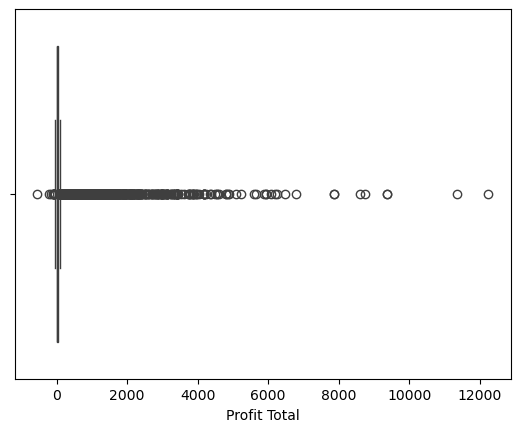

In [ ]:
sns.boxplot(x=df["Profit Total"])

In [67]:
df["Profit Total"].describe()

count    159904.000000
mean         49.078793
std         153.467941
min        -543.000000
25%          12.180000
50%          26.220000
75%          51.000000
max       12240.000000
Name: Profit Total, dtype: float64

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?